# Read CSV file using pandas

In [1]:
import pandas as pd

bloodSample = pd.read_csv('CS19M001 Aleti Eswararao - blood_sample.csv')

# Select row Indices which are having AGE not in [65,89]

In [2]:
rowIndices = bloodSample[(bloodSample['AGE']<65) | (bloodSample['AGE']>89)].index
print(rowIndices.size)

4


# Select row Indices which are having SEX as empty or value is other than 1,2

In [3]:
rowIndices = rowIndices.append(bloodSample[(bloodSample['SEX']!=1) & (bloodSample['SEX']!=2) ].index)
print(rowIndices.size)

7


# Select row Indices which are having Laboratory not in [1,6]

In [4]:
rowIndices = rowIndices.append(bloodSample[(bloodSample['Laboratory']<1) | (bloodSample['Laboratory']>6)].index)
print(rowIndices.size)

9


# Select row Indices which are having invalid AGE_GROUP as (1=65-69; 2=70-74; 3=75-79; 4=80-84; 5=85-89)

In [5]:
lower_bound = 65
upper_bound = 69
group = 1
for i in range(5):
    rowIndices = rowIndices.append(bloodSample[(bloodSample['AGE']>=lower_bound) & (bloodSample['AGE']<=upper_bound) & (bloodSample['AGE_GROUP']!=group)].index)
    lower_bound+=5
    upper_bound+=5
    group+=1
print(rowIndices.size)
print(rowIndices)

9
Int64Index([19, 68, 96, 136, 73, 81, 171, 68, 158], dtype='int64')


# Drop corresponding indices of dataframe

In [6]:
print(bloodSample.index[10:30])
bloodSample.drop(rowIndices,inplace=True)
print(bloodSample.shape)

RangeIndex(start=10, stop=30, step=1)
(175, 11)


# Delete Use less columns which are having all values as NaN

In [7]:
print(bloodSample.columns)
null_col = bloodSample.columns[bloodSample.isnull().all()]
bloodSample.drop(null_col, axis=1, inplace=True)
print(null_col)
print(bloodSample.columns)
bloodSample.shape

Index(['Subject No.', 'AGE', 'SEX', 'ALKA_PHOS', 'Cal', 'I_PHOS', 'Laboratory',
       'CA_MMOL', 'PHOS_MMOL', 'AGE_GROUP', 'Unnamed: 10'],
      dtype='object')
Index(['Unnamed: 10'], dtype='object')
Index(['Subject No.', 'AGE', 'SEX', 'ALKA_PHOS', 'Cal', 'I_PHOS', 'Laboratory',
       'CA_MMOL', 'PHOS_MMOL', 'AGE_GROUP'],
      dtype='object')


(175, 10)

# Deleting duplicate rows

In [8]:
#print(bloodSample.duplicated().any())
bloodSample.drop_duplicates(keep = False, inplace = True) 
bloodSample.shape

(165, 10)

# Finding Mean of each column

In [9]:
bloodSample.mean()

Subject No.    89.709091
AGE            72.381818
SEX             1.490909
ALKA_PHOS      92.236364
Cal             9.414545
I_PHOS          5.777744
Laboratory      2.090909
CA_MMOL         2.355091
PHOS_MMOL       1.161524
AGE_GROUP       2.090909
dtype: float64

# Finding Median of each column

In [10]:
bloodSample.medianan()

Subject No.    90.00
AGE            72.00
SEX             1.00
ALKA_PHOS      86.00
Cal             9.40
I_PHOS          3.50
Laboratory      2.00
CA_MMOL         2.35
PHOS_MMOL       1.13
AGE_GROUP       2.00
dtype: float64

# Finding Standard deviation of each column

In [12]:
bloodSample.std()

Subject No.    50.821785
AGE             4.900812
SEX             0.501439
ALKA_PHOS      29.639684
Cal             0.545743
I_PHOS          7.772380
Laboratory      1.460113
CA_MMOL         0.181036
PHOS_MMOL       0.659131
AGE_GROUP       0.980407
dtype: float64

# Finding minimum of each column

In [13]:
bloodSample.min()

Subject No.     1.00
AGE            65.00
SEX             1.00
ALKA_PHOS      42.00
Cal             7.60
I_PHOS          1.60
Laboratory      1.00
CA_MMOL         1.05
PHOS_MMOL       0.09
AGE_GROUP       1.00
dtype: float64

# Finding maximum of each column

In [14]:
bloodSample.max()

Subject No.    178.00
AGE             89.00
SEX              2.00
ALKA_PHOS      219.00
Cal             11.00
I_PHOS          38.00
Laboratory       6.00
CA_MMOL          3.20
PHOS_MMOL        8.84
AGE_GROUP        5.00
dtype: float64

# Constructing boxplots with respect to SEX

<Figure size 432x288 with 0 Axes>

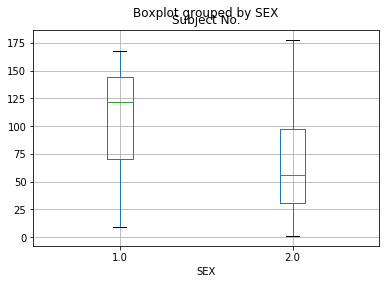

<Figure size 432x288 with 0 Axes>

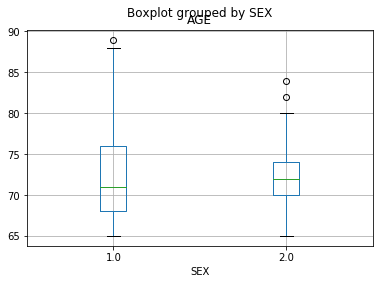

<Figure size 432x288 with 0 Axes>

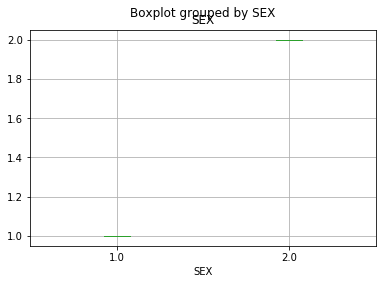

<Figure size 432x288 with 0 Axes>

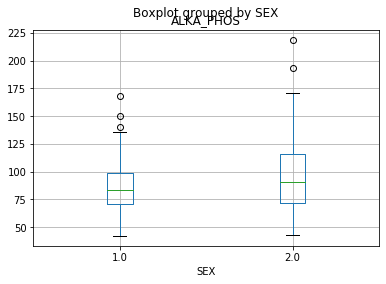

<Figure size 432x288 with 0 Axes>

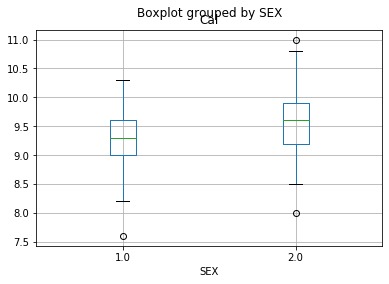

<Figure size 432x288 with 0 Axes>

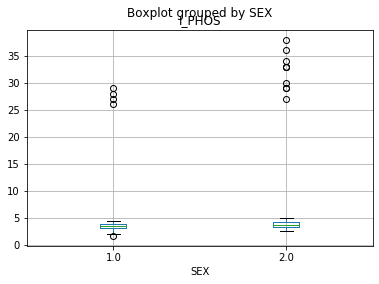

<Figure size 432x288 with 0 Axes>

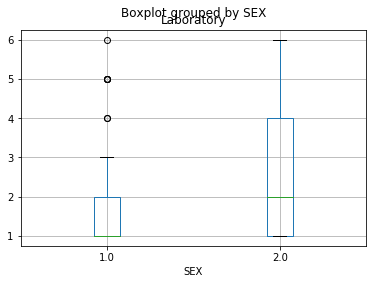

<Figure size 432x288 with 0 Axes>

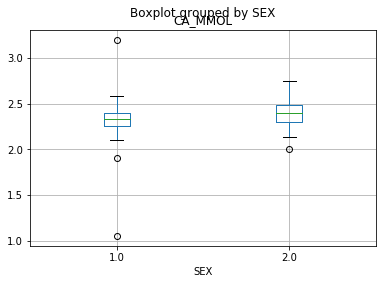

<Figure size 432x288 with 0 Axes>

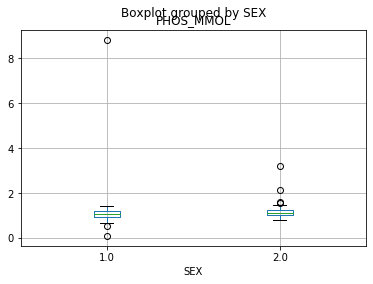

<Figure size 432x288 with 0 Axes>

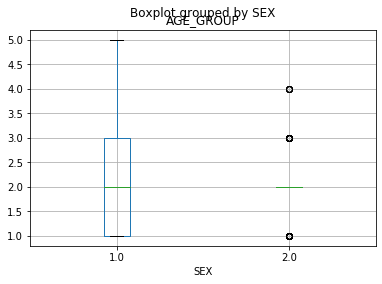

In [17]:
import matplotlib.pyplot as plt

for column in bloodSample:
    plt.figure()
    bloodSample.boxplot([column] , 'SEX')

# Constructing boxplots with respect to SEX

<Figure size 432x288 with 0 Axes>

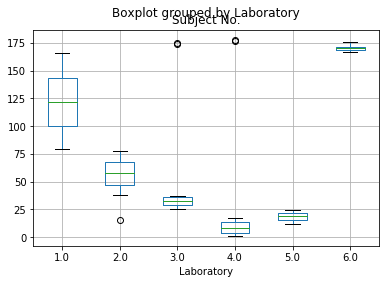

<Figure size 432x288 with 0 Axes>

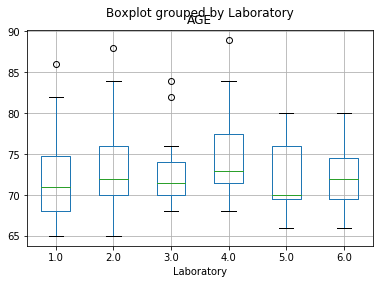

<Figure size 432x288 with 0 Axes>

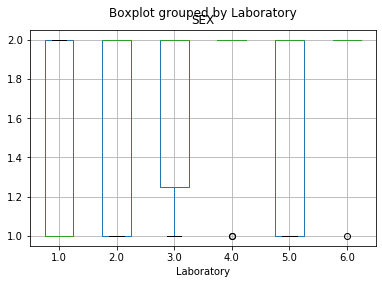

<Figure size 432x288 with 0 Axes>

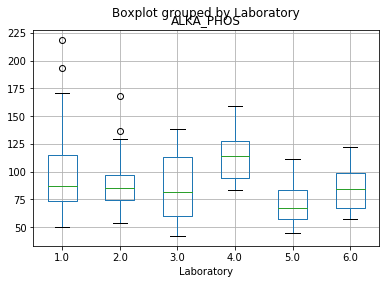

<Figure size 432x288 with 0 Axes>

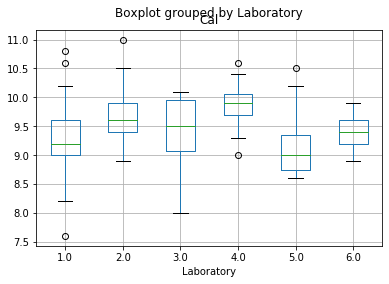

<Figure size 432x288 with 0 Axes>

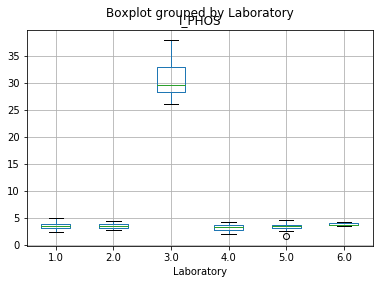

<Figure size 432x288 with 0 Axes>

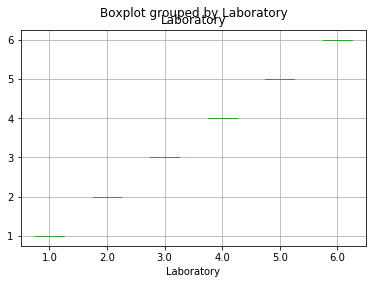

<Figure size 432x288 with 0 Axes>

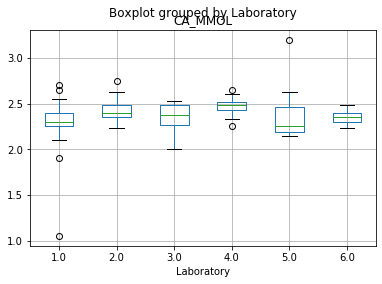

<Figure size 432x288 with 0 Axes>

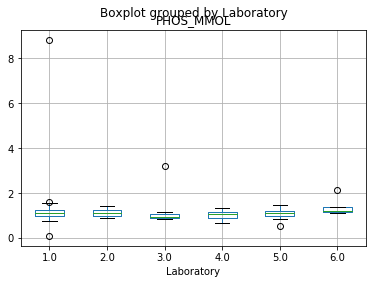

<Figure size 432x288 with 0 Axes>

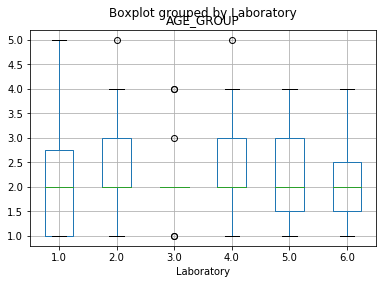

In [18]:
import matplotlib.pyplot as plt

for column in bloodSample:
    plt.figure()
    bloodSample.boxplot([column] , 'Laboratory')